# Final-Project

Robby Gold, Zhiyuan Hu, Lining Liu

For our project, we decided to evaluate the neighborhoods of Pittsburgh through the eyes of a child. We first thought about what things a child would want most in a neighborhood, and we settled on three main ideas: Parks, Sports, and Playgrounds. We each found a dataset that was relevant to one of these categories and used that for our analysis and metric. The datasets and their links are as follows:

Robby's dataset: City of Pittsburgh Courts and Rinks (https://data.wprdc.org/dataset/city-of-pittsburgh-courts)

Zhiyuan's dataset: Allegheny County Park Facilities (https://data.wprdc.org/dataset/allegheny-county-park-facilities)
Parks (https://data.wprdc.org/dataset/parks1)

Lining's datasets: Playground Equipment (https://data.wprdc.org/dataset/playground-equipment) 
City of Pittsburgh Playgrounds (https://data.wprdc.org/dataset/playgrounds)


# Courts and Rinks
## Robby Gold

### Introduction and Dataset

With our topic being the best neighborhood to live in from a child's perspective, I created a metric to rank the towns based on the sporting facilities present in each area. I used dataset titled "Codes and Rinks in Pittsburgh" This dataset gives the user every court or rink in Pittsburgh, with a lot of other information about police and fire zoning as well as other basic location information, such as longitude and latitude or the council district that the park is in. Below is the first ten values of the raw dataset as it is given.

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import numpy as np

%matplotlib inline

In [135]:
chip = pd.read_csv('Courts-and-Rinks.csv', sep=',')
chip.head(10)

,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.45444,-80.00810
1,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.45240,-80.01253
2,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.45224,-80.01215
3,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.45207,-80.01177
4,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.41415,-80.02230
5,299909706,Alton Park Basketball Court 2,Basketball (Full),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.41415,-80.02209
6,912994212,Ammon Park Basketball Court 1,Basketball (Full),Ammon Park,NaN,Asphalt,0,f,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.44933,-79.97747
7,1342647628,Ammon Park Basketball Court 2,Basketball (Full),Ammon Park,NaN,Asphalt,0,f,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.44918,-79.97737
8,470473315,Arlington Park Basketball Court 1,Basketball (Full),Arlington Park,NaN,Asphalt,0,f,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.41799,-79.97505
9,229834077,Armstrong Park Basketball Court 1,Basketball (Full),Armstrong Park,NaN,Asphalt,0,f,South Side Flats,3,17,42003170200,3,17,3,4-24,40.42792,-79.98601


This dataset has a lot of columns, and I have no use for most of them. This code eliminates every column that I have no use for.

In [136]:
chip = chip.drop(['id', 'location', 'surface_material', 'grandstand', 'inactive', 'council_district', 'ward', 'tract', 'public_works_division', 'pli_division', 'police_zone', 
                  'fire_zone'], axis=1)
chip.head(10)

,name,type,park,neighborhood,latitude,longitude
0,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,Allegheny Center,40.45444,-80.00810
1,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,Allegheny Center,40.45240,-80.01253
2,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,Allegheny Center,40.45224,-80.01215
3,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,Allegheny Center,40.45207,-80.01177
4,Alton Park Basketball Court 1,Basketball (Half),Alton Park,Beechview,40.41415,-80.02230
5,Alton Park Basketball Court 2,Basketball (Full),Alton Park,Beechview,40.41415,-80.02209
6,Ammon Park Basketball Court 1,Basketball (Full),Ammon Park,Bedford Dwellings,40.44933,-79.97747
7,Ammon Park Basketball Court 2,Basketball (Full),Ammon Park,Bedford Dwellings,40.44918,-79.97737
8,Arlington Park Basketball Court 1,Basketball (Full),Arlington Park,South Side Slopes,40.41799,-79.97505
9,Armstrong Park Basketball Court 1,Basketball (Full),Armstrong Park,South Side Flats,40.42792,-79.98601


### Court Score and Dictionary

I then created a metric using if statements to loop through the dataframe row by row, and calculate a value based on the types of parks present in each neighborhood. I stored these values by neighborhood in a dictionary.
As seen below, the scoring is as follows:

Each Basketball (Full) is 5 points.
Basketball (Half) and Volleyball are worth 3 points each.
Tennis is worth 2 points each.
General Sports, Street Hocket, Dek Hockey, Hockey, Pickleball, Bocce, and Horseshoe Pit are all worth 1 point each.

In [137]:
grade = {}
curr = 0
for row in chip.iterrows():
    if (chip.iat[curr , 1] == 'Basketball (Full)'):
        try:
            grade[chip.iat[curr, 3]] = grade[chip.iat[curr, 3]] + 5
        except:
            grade[chip.iat[curr, 3]] = 5
    elif (chip.iat[curr , 1] == 'Basketball (Half)' or 'Volleyball'):
        try:
            grade[chip.iat[curr, 3]] = grade[chip.iat[curr, 3]] + 3
        except:
            grade[chip.iat[curr, 3]] = 3
    elif (chip.iat[curr , 1] == 'Tennis'):
        try:
            grade[chip.iat[curr, 3]] = grade[chip.iat[curr, 3]] + 2
        except:
            grade[chip.iat[curr, 3]] = 2
    elif (chip.iat[curr , 1] == 'General Sports' or 'Street Hockey' or 'Dek Hockey' or 'Hockey' or 'Pickleball' or 'Bocce'
       or 'Horseshoe Pit'):
        try:
            grade[chip.iat[curr, 3]] = grade[chip.iat[curr, 3]] + 1
        except:
            grade[chip.iat[curr, 3]] = 1
    curr = curr + 1
grade

{'Allegheny Center': 29,
 'Beechview': 29,
 'Bedford Dwellings': 10,
 'South Side Slopes': 26,
 'South Side Flats': 19,
 'Lower Lawrenceville': 20,
 'Crawford-Roberts': 8,
 'Banksville': 11,
 'Bon Air': 3,
 'Central Oakland': 3,
 'Brighton Heights': 8,
 'Brookline': 31,
 'Hazelwood': 40,
 'Lincoln-Lemington-Belmar': 10,
 'Troy Hill': 28,
 'Perry South': 3,
 'Homewood West': 5,
 'Squirrel Hill South': 84,
 'Strip District': 3,
 'Stanton Heights': 6,
 'Crafton Heights': 13,
 'Upper Lawrenceville': 8,
 'East Carnegie': 8,
 'East Hills': 10,
 'Duquesne Heights': 6,
 'Allentown': 5,
 'Mount Washington': 19,
 'East Liberty': 24,
 'Fairywood': 10,
 'Fineview': 6,
 'Garfield': 13,
 'Greenfield': 21,
 'South Oakland': 8,
 'Point Breeze': 6,
 'Regent Square': 18,
 'Hays': 3,
 'Elliott': 19,
 'Morningside': 14,
 'Highland Park': 60,
 'Central Northside': 10,
 'Terrace Village': 23,
 'Larimer': 5,
 'Spring Hill-City View': 16,
 'Carrick': 13,
 'Central Lawrenceville': 5,
 'Manchester': 24,
 'Marsh

### Bar Chart

Obviously, the data above that is in the dictionary is very difficult to work with at face value and worst of all, it can't be sorted easily. In the code below, I create a new dataframe using the dictionary and then sort the dataframe based on the score. I then use that sorted dataframe to create my chart which makes for a much better viewing experience.

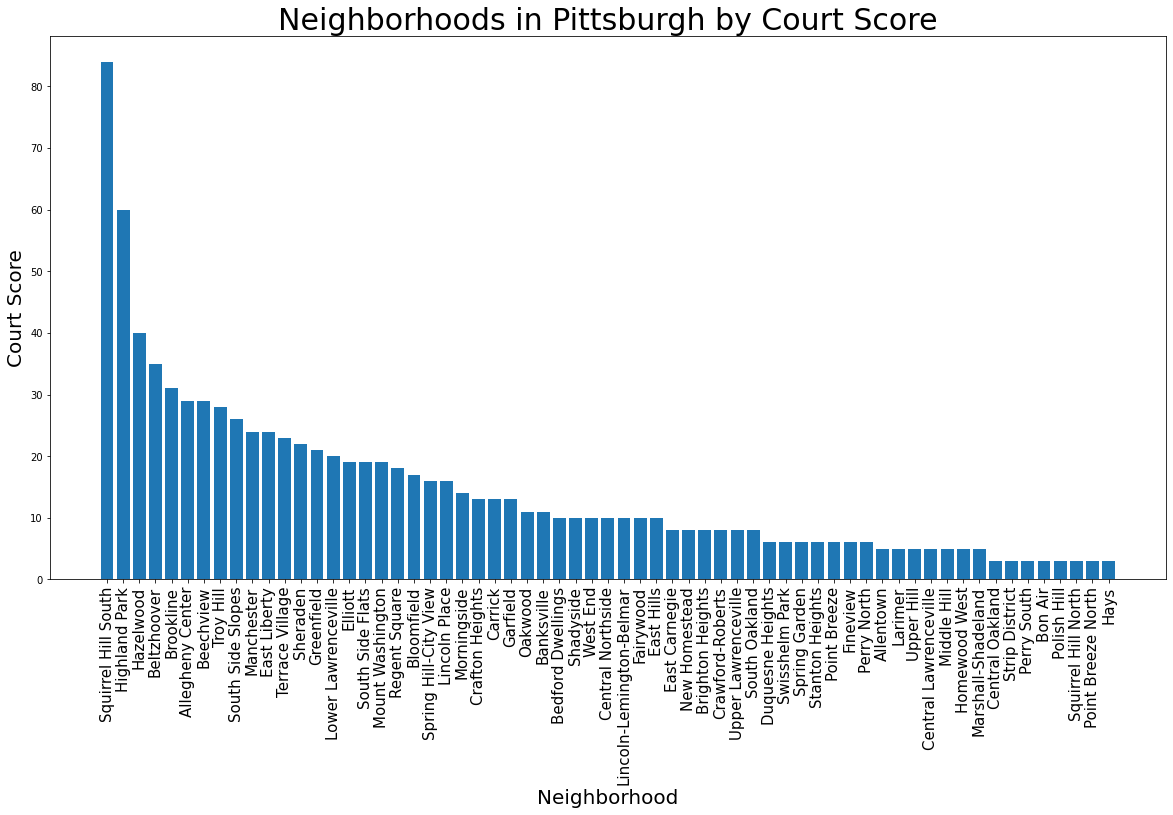

In [138]:
df = pd.DataFrame(list(grade.items()), columns = ['Neighborhood', 'Court Score'])
plt.figure(figsize = (20,10))
plt.bar('Neighborhood', 'Court Score', data=df.sort_values(by='Court Score', ascending=False))
plt.xlabel("Neighborhood", fontsize='20')
plt.ylabel("Court Score", fontsize='20')
plt.title("Neighborhoods in Pittsburgh by Court Score", fontsize='30')
plt.xticks(rotation = 90, fontsize='15')
plt.show()

This bar chart is a much better visualization, but because of the nature of this assignment, we really don't need to pay attention to the lower valued items. Below, I recreate the same bar chart, but I use the head command to only show the top 5 values.

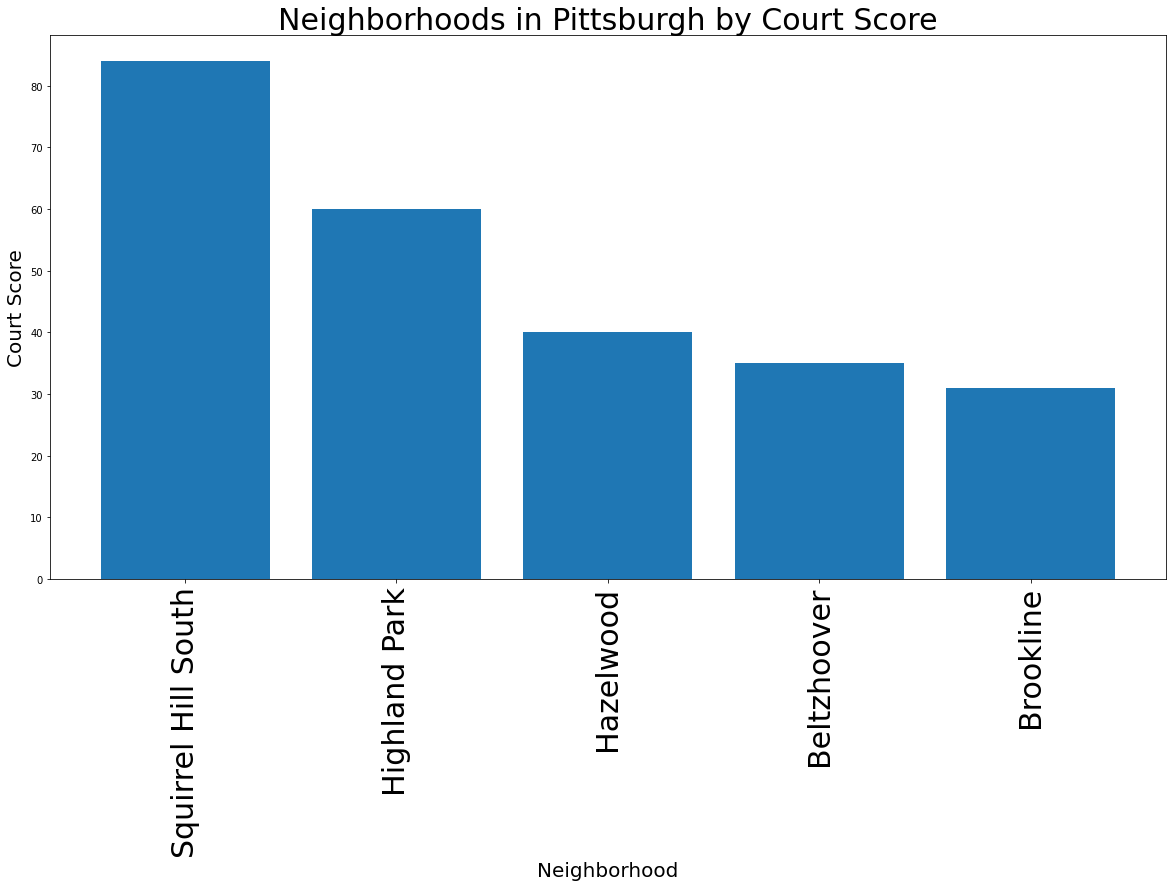

In [139]:
df = pd.DataFrame(list(grade.items()), columns = ['Neighborhood', 'Court Score'])
plt.figure(figsize = (20,10))
plt.bar('Neighborhood', 'Court Score', data=df.sort_values(by='Court Score', ascending=False).head(5))
plt.xlabel("Neighborhood", fontsize='20')
plt.ylabel("Court Score", fontsize='20')
plt.title("Neighborhoods in Pittsburgh by Court Score", fontsize='30')
plt.xticks(rotation = 90, fontsize='30')
plt.show()

### Heat Map

I also decided to create a heat map to really show the disparity in the lead more easily. It is for this reason that I kept the latitude and longitude values in my initial dataset, as it made it super easy to create this map.

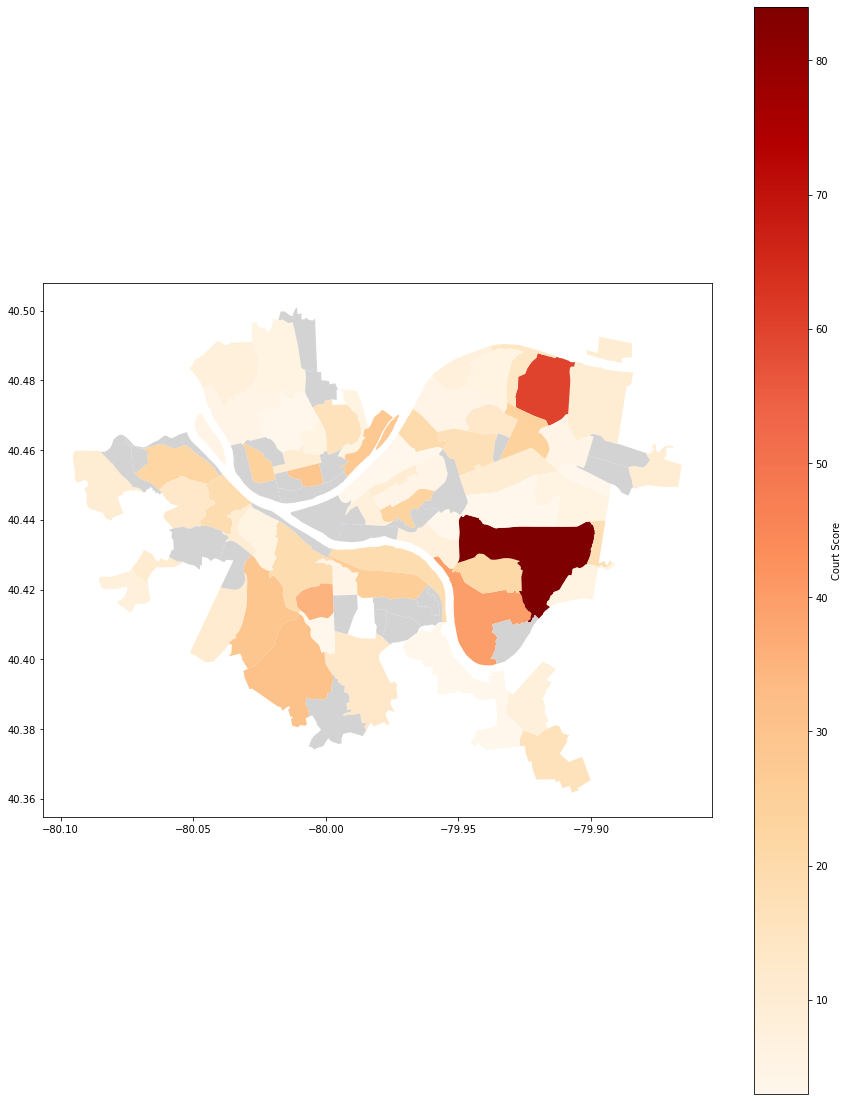

In [140]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
grade_map = neighborhoods.merge(df, how='left', left_on='hood', right_on='Neighborhood')
grade_map.plot(
    column='Court Score',
    cmap='OrRd',
    legend=True,
    figsize=(15,20),
    legend_kwds={'label': "Court Score"},
    missing_kwds={"color": "lightgrey"}
    )

As one can see, the neighborhood with the highest Court Score was by far Squirrel Hill South. As we saw in the bar chart, only one other neighborhood has even half the score of Squirrel Hill South, and that is Highland Park. Considering the fact that both Schenley and Frick park are in this neighborhood, it makes sense that this area blows away the competition easily as it is very common for parks to feature sports facilities.

## My Conclusion

Therefore, in the eyes of a child rated by Court Score, Squirrel Hill South is by far the best area to live in Pittsburgh.

# Playground Equipment
## Lining Liu

### Introduction and Dataset



My dataset has to do with types of playground equipment throughout Pittsburgh. I created a metric to rank the neighborhoods based on the different equipment present based on my preference. Below, I import my dataset and show a preview of what it looks like.

In [141]:
pg = pd.read_csv('Playground-Equipment.csv')
pg

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.00000,Coast Ave,Beechview,4,19,42003192000,5,19,6,4-28,40.40838,-80.02852
1,702514290,North Ave. Playground,Play Area 2 to 5,Playworld,SofSurfaces,f,377.00000,W North Ave,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.45453,-80.01019
2,1267038491,Vietnam Veteran's Playground,Slide,Little Tykes,SofSurfaces,f,108.00000,Panther Hollow Rd,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.43418,-79.94432
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.43213,-79.94777
4,204832406,Schenley Overlook Playground,Slide,Little Tykes,SofSurfaces,f,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.43221,-79.94782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,1301777506,Granville Playground,Play Area 2 to 5,Playworld,SofSurfaces,f,175.00000,Granville St,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.44448,-79.98307
441,1828281616,Granville Playground,Geo Climber,Playworld,SofSurfaces,f,175.00000,Granville St,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.44458,-79.98308
442,904290786,Spring Garden Ave Playground,Geo Climber,NaN,Engineered Wood Fiber,f,844.00000,Spring Garden Ave,East Allegheny,1,23,42003563200,1,23,1,1-5,40.45766,-79.99620
443,370549255,Spring Garden Ave Playground,Spring Toy - Fire Truck,NaN,Engineered Wood Fiber,f,844.00000,Spring Garden Ave,East Allegheny,1,23,42003563200,1,23,1,1-5,40.45769,-79.99616


### Assigning Values and Calculating Score

I assign a value between 0 and 1 based on my interpretation of how much children under 10 would like the equipment type in the playground. For example, Play area 2 to 5 has the lowest score because the targetted range is small and young for all kids under 10. On the other hand, 3 swings and above have the highest score because generally, any given age likes swings especially when there are multiple swings to allow friends to play together.

In [142]:
rate={}
pwr=0
for index, row in pg.iterrows():          # running through all data, change the dictionary value for different types of equipemnt for every neighborhood as the dictionary key
    if (pg.iat[index, 2].startswith('Play Area 5') or pg.iat[index, 2].startswith('Whirl') or pg.iat[index, 2].startswith('Slide') or pg.iat[index, 2].startswith('Balan')):
        try:                              #see if the neighborhood is already in the dictionary
            rate[pg.iat[index, 8]]=rate[pg.iat[index, 8]]+0.8
        except:                           #asign a initial value for neighborhood that is not in the dictionary yet
            rate[pg.iat[index, 8]]=0.8
    elif (pg.iat[index, 2].startswith('Spring Toy')):
         try:
            rate[pg.iat[index, 8]]=rate[pg.iat[index, 8]]+0.6
         except:
            rate[pg.iat[index, 8]]=0.6
    elif (pg.iat[index, 2].startswith('Swing 3') or pg.iat[index, 2].startswith('Swing 4') or pg.iat[index, 2].startswith('Swing 5')):
         try:
            rate[pg.iat[index, 8]]=rate[pg.iat[index, 8]]+1
         except:
            rate[pg.iat[index, 8]]=1
    elif (pg.iat[index, 2].startswith('Swing 2')):
         try:
            rate[pg.iat[index, 8]]=rate[pg.iat[index, 8]]+0.9
         except:
            rate[pg.iat[index, 8]]=0.9
    elif (pg.iat[index, 2].startswith('Play Area 2') or pg.iat[index, 2].startswith('Rock')):
         try:
            rate[pg.iat[index, 8]]=rate[pg.iat[index, 8]]+0.4
         except:
            rate[pg.iat[index, 8]]=0.4
    elif (pg.iat[index, 2].startswith('Swing 1') or pg.iat[index, 2].startswith('Wall')or pg.iat[index, 2].startswith('Geo')or pg.iat[index, 2].startswith('Ladder') or pg.iat[index, 2].startswith('Clim')):
         try:
            rate[pg.iat[index, 8]]=rate[pg.iat[index, 8]]+0.7
         except:
            rate[pg.iat[index, 8]]=0.7
    elif(pg.iat[index, 2].startswith('Stepping') or pg.iat[index, 2].startswith('Spin') or pg.iat[index, 2].startswith('Play Area P')):
         try:
            rate[pg.iat[index, 8]]=rate[pg.iat[index, 8]]+0.5
         except:
            rate[pg.iat[index, 8]]=0.5
   
rate

{'Beechview': 14.900000000000002,
 'Allegheny Center': 9.799999999999999,
 'Squirrel Hill South': 23.500000000000004,
 'Windgap': 3.8,
 'Perry South': 2.5,
 'Crafton Heights': 3.8000000000000003,
 'Fineview': 5.700000000000001,
 'Terrace Village': 3.2,
 'Hazelwood': 9.5,
 'Lincoln Place': 6.6000000000000005,
 'Sheraden': 9.8,
 'Brookline': 5.3999999999999995,
 'Oakwood': 3.0,
 'New Homestead': 3.7,
 'South Side Slopes': 10.300000000000002,
 'Upper Hill': 3.6000000000000005,
 'Brighton Heights': 5.6000000000000005,
 'Allentown': 2.8,
 'East Liberty': 17.000000000000004,
 'Highland Park': 7.500000000000001,
 'Central Northside': 1.9,
 'Bloomfield': 4.7,
 'Mount Washington': 7.1000000000000005,
 'Shadyside': 3.0,
 'Westwood': 1.4,
 'Hays': 2.3000000000000003,
 'Polish Hill': 2.8000000000000003,
 'Central Oakland': 1.3,
 'Lincoln-Lemington-Belmar': 3.9,
 'Esplen': 1.3,
 'Greenfield': 4.9,
 'Crawford-Roberts': 5.4,
 'Bedford Dwellings': 2.2,
 'Marshall-Shadeland': 2.9000000000000004,
 'Belt

In [143]:
new_rate = pd.DataFrame(list(rate.items()), columns = ['Neighborhood', 'Rating'])
pd.options.display.float_format = '{:.1f}'.format
new_rate = new_rate.sort_values(['Rating'], ascending=False)
print(new_rate)

           Neighborhood  Rating
2   Squirrel Hill South    23.5
18         East Liberty    17.0
0             Beechview    14.9
14    South Side Slopes    10.3
10             Sheraden     9.8
..                  ...     ...
49  Lower Lawrenceville     1.4
27      Central Oakland     1.3
29               Esplen     1.3
39       Strip District     0.4
35         West Oakland     0.4

[68 rows x 2 columns]


### Visualization of Data

Using bar graph to better show the resulting data, first all the data then the bar graph of top five.

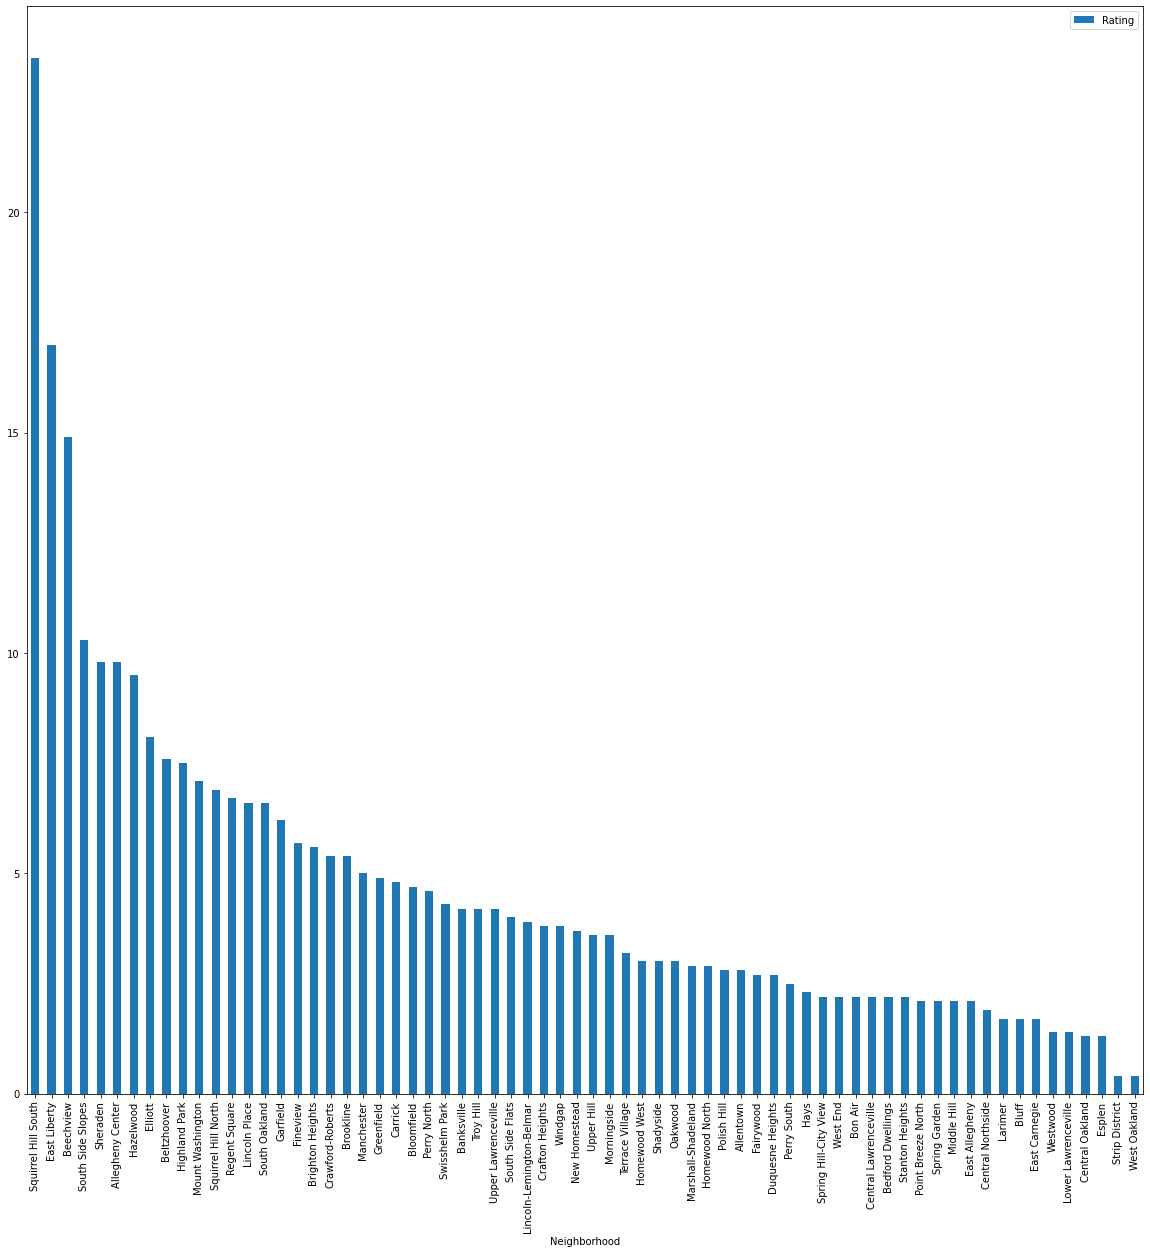

In [144]:
new_rate.plot.bar(figsize=(20,20), x='Neighborhood')

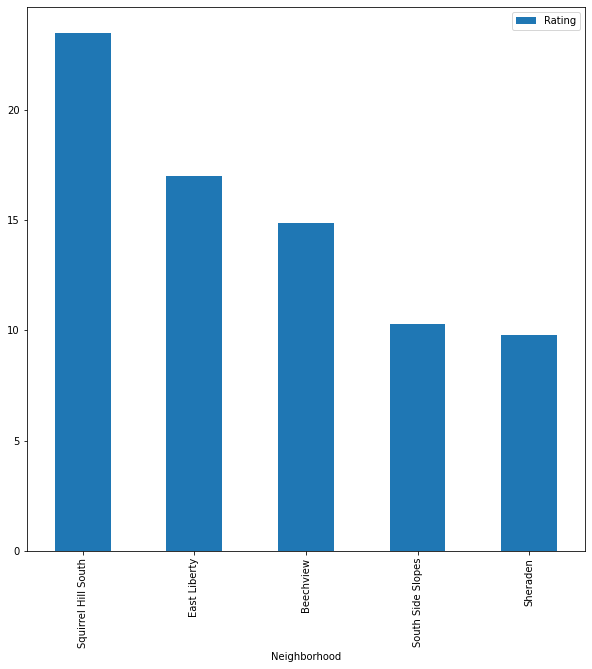

In [145]:
new_rate.head(5).plot.bar(figsize=(10,10),x='Neighborhood')

### Heat Map
Creating a heat map of my data

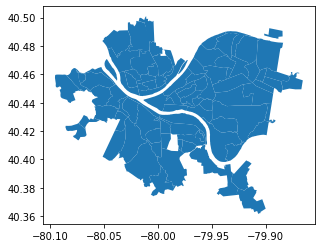

In [146]:
neighborhoods.plot()

In [147]:
mapthing = neighborhoods.merge(new_rate, how='left', left_on='hood', right_on='Neighborhood')
mapthing.head()

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry,Neighborhood,Rating
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7842996.6,11525.9,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",Central Oakland,1.3
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,13904691.4,20945.6,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",NaN,NaN
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5998648.9,18280.5,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",West Oakland,0.4
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7203337.0,15697.9,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",Crawford-Roberts,5.4
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,Andrea Lavin Kossis,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,16948752.8,24019.5,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",Strip District,0.4


### Plotting the Map

Use the data for coloring the map, I selected red color for coloring with white boundaries, I'm also showing the legend for easier identification of the meaning of color.

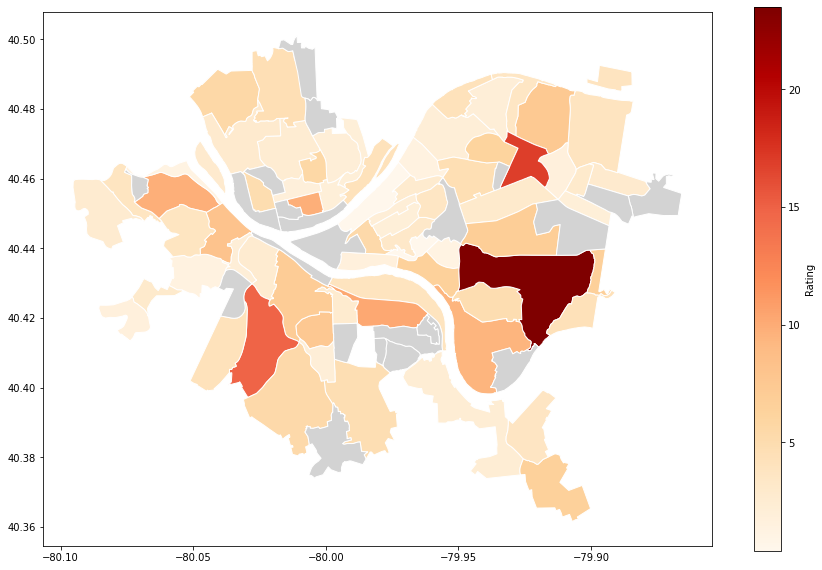

In [148]:
mapthing.plot(
    column='Rating',
    cmap='OrRd',
    edgecolor="white",
    legend=True,
    legend_kwds={'label': "Rating"},
    figsize=(15,10),
    missing_kwds={"color": "lightgrey"}
    )

## Conclusion

Squirrel Hill South has the highest score and is therefore the best place for a kid to live in terms of playground equipment.

# Parks
## Zhiyuan Hu

### Introduction and Dataset

In this project, I use Pittsburgh parks data to find which neighborhood is the most popular one for kids. To do that I use the area of parks in each neighborhood as the most decisive condition to determine which neighborhood is the best for kids. In the project, I will use some graphs at the end to visualize my conclusion.

The code below is to clarify what are pd, plt and gp, which are use to create dataframe and make bar graph and heat map.

In [149]:
park = pd.read_csv('New-Parks.csv', sep =',')
del park['id']
del park['type']
del park['maintenance_responsibility']
del park['image']
del park['council_district']
del park['ward']
del park['tract']
del park['public_works_division']
del park['police_zone']
del park['pli_division']
del park['fire_zone']

print(park)

                        name        neighborhood  latitude  longitude
0             Able Long Park           Beechview      40.4      -80.0
1    Albert Turk Graham Park    Crawford-Roberts      40.4      -80.0
2                 Alcoa Park         North Shore      40.4      -80.0
3          Allegheny Commons    Allegheny Center      40.5      -80.0
4     Allegheny Landing Park         North Shore      40.4      -80.0
..                       ...                 ...       ...        ...
204           Woods Run Park  Marshall-Shadeland      40.5      -80.0
205         Young Field Park  Marshall-Shadeland      40.5      -80.0
206              Zulema Park     Central Oakland      40.4      -80.0
207       Liberty Green Park        East Liberty      40.5      -79.9
208         Esser Plaza Park    South Side Flats      40.4      -80.0

[209 rows x 4 columns]


In these code, I inserted the data that include parks' name, neighborhood, latitude and longitude. I deleted all other useless columns to make my dataframe clear. The reason why I keep the latitude and longitude is to make the heat map.

In [150]:
op= pd.read_csv('Old-Parks.csv', sep =',')
del op['objectid_1']
del op['objectid']
del op['acreage']
del op['final_cat']
del op['type']
del op['sector']
del op['origpkname']
del op['alterntnam']
del op['divname']
del op['shape_area']
del op['shape_leng']
del op['globalid']
del op['created_user']
del op['created_date']
del op['last_edited_user']
del op['last_edited_date']
del op['maintenanceresponsibility']
del op['dpw_ac']
del op['globalid_2']
del op['shape_length']
op.columns=op.columns.str.replace('updatepknm', 'name')
op.head()

,sqft,name
0,175418.9,Alton Park
1,293842.1,Dunbar Park
2,314514.4,Frank Curto Park
3,183975.5,Cowley Park
4,226187.0,McGonigle Park


In these code, I inserted another data that include the park's name and square footage. In this way I can find which neighborhood has the biggest park area. I deleted all other useless columns. 

In [151]:
np = pd.merge(park, op, on='name')
print(np)

                        name        neighborhood  latitude  longitude  \
0             Able Long Park           Beechview      40.4      -80.0   
1    Albert Turk Graham Park    Crawford-Roberts      40.4      -80.0   
2                 Alcoa Park         North Shore      40.4      -80.0   
3          Allegheny Commons    Allegheny Center      40.5      -80.0   
4     Allegheny Landing Park         North Shore      40.4      -80.0   
..                       ...                 ...       ...        ...   
200           Woods Run Park  Marshall-Shadeland      40.5      -80.0   
201         Young Field Park  Marshall-Shadeland      40.5      -80.0   
202              Zulema Park     Central Oakland      40.4      -80.0   
203       Liberty Green Park        East Liberty      40.5      -79.9   
204         Esser Plaza Park    South Side Flats      40.4      -80.0   

         sqft  
0     72288.3  
1     16620.1  
2     25060.4  
3   2673959.4  
4     99559.5  
..        ...  
200   16908

In this line, I merged two dataset together based on parks' names, because two dataset both have this in common.

In [152]:
parks = dict()
for index, row in np.iterrows():
    try:
        parks[np.iat[index - 1, 1]] = parks[np.iat[index - 1, 1]] + np.iat[index - 1, 4]
    except:
        parks[np.iat[index - 1, 1]] = np.iat[index - 1, 4]
parks

{'South Side Flats': 797493.92040023,
 'Beechview': 669795.72293664,
 'Crawford-Roberts': 81089.62230829,
 'North Shore': 755694.70278548,
 'Allegheny Center': 2783957.22573607,
 'Central Business District': 379909.99676126003,
 'Central Northside': 40157.14316626,
 'East Liberty': 537120.78701639,
 'Bedford Dwellings': 352034.49084877,
 'South Side Slopes': 3103461.4855487803,
 'Lower Lawrenceville': 793990.03510018,
 'Banksville': 836855.95778245,
 'South Oakland': 181248.88221647,
 'Homewood North': 67475.15516742,
 'Hazelwood': 788205.77307154,
 'Bon Air': 33953.56076913,
 'Central Oakland': 80327.39026066,
 'Brighton Heights': 1534681.8861377698,
 'Brookline': 4779746.041326299,
 'Spring Garden': 309161.20811653003,
 'Lincoln-Lemington-Belmar': 474570.97800664004,
 'Windgap': 267825.86052636,
 'Troy Hill': 751694.4140941501,
 'Westwood': 157894.12103649002,
 'Perry South': 322906.30842506996,
 'Homewood West': 18666.48700753,
 'Squirrel Hill South': 45427494.89809096,
 'Strip Dist

I made a dictionary in this part, it is used to sum up park's area in the same neighborhoods, I set each neighborhood as one "word" in dictionary. and add all the same neighborhood's area together to make this dictionary.

In [153]:
new_np = pd.DataFrame(list(parks.items()), columns = ['Neighborhood', 'Square Footage'])
pd.options.display.float_format = '{:.5f}'.format
new_np = new_np.sort_values(['Square Footage'], ascending=False)
print(new_np.head(20))

           Neighborhood  Square Footage
26  Squirrel Hill South  45427494.89809
49        Highland Park  16684225.50010
45          Perry North  11334386.60673
18            Brookline   4779746.04133
60          Beltzhoover   3491359.91636
9     South Side Slopes   3103461.48555
4      Allegheny Center   2783957.22574
37     Mount Washington   2746407.88242
59             Sheraden   2553909.20225
17     Brighton Heights   1534681.88614
34         Point Breeze   1454082.92518
35            Allentown   1433968.30505
54              Carrick   1399851.58594
48              Elliott   1336541.54272
56        Lincoln Place   1017712.49080
63          Polish Hill    982906.25912
11           Banksville    836855.95778
0      South Side Flats    797493.92040
10  Lower Lawrenceville    793990.03510
14            Hazelwood    788205.77307


I maked a dataframe base on the dataframe and take 5 digits after decimal place as the result of 'Square Footage'. Thank I sort the dataset by the area.

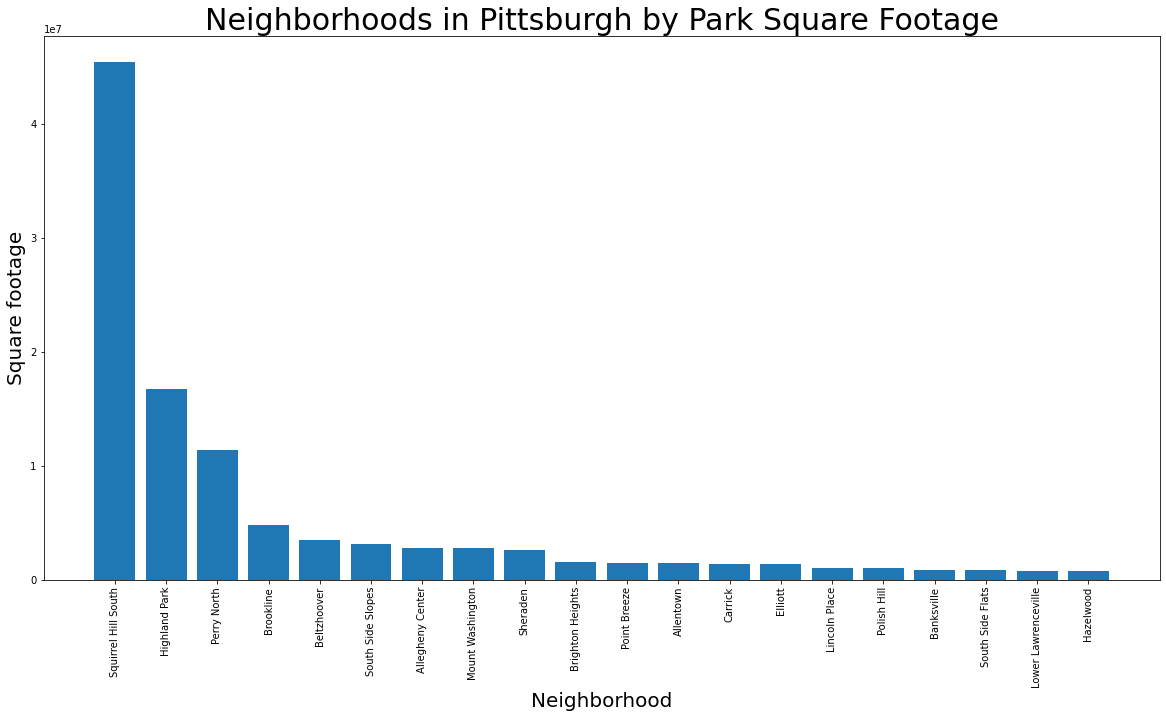

In [154]:
plt.figure(figsize=(20,10))
plt.bar('Neighborhood', 'Square Footage', data=new_np.head(20))
plt.xlabel("Neighborhood", fontsize='20')
plt.ylabel("Square footage", fontsize='20')
plt.title("Neighborhoods in Pittsburgh by Park Square Footage", fontsize ='30')
plt.xticks(rotation=90)
plt.show()

To make the data more visualize, I made a bar graph with first twenty neighborhoods by using plt.. I set the graph size to 20:10. I also give a title to this graph. I label the x and y axis as square footage and neighborhood. In the end I rotate the y axis title to make it looks better. As we can see, Squirrel Hill South has the biggest area of park.

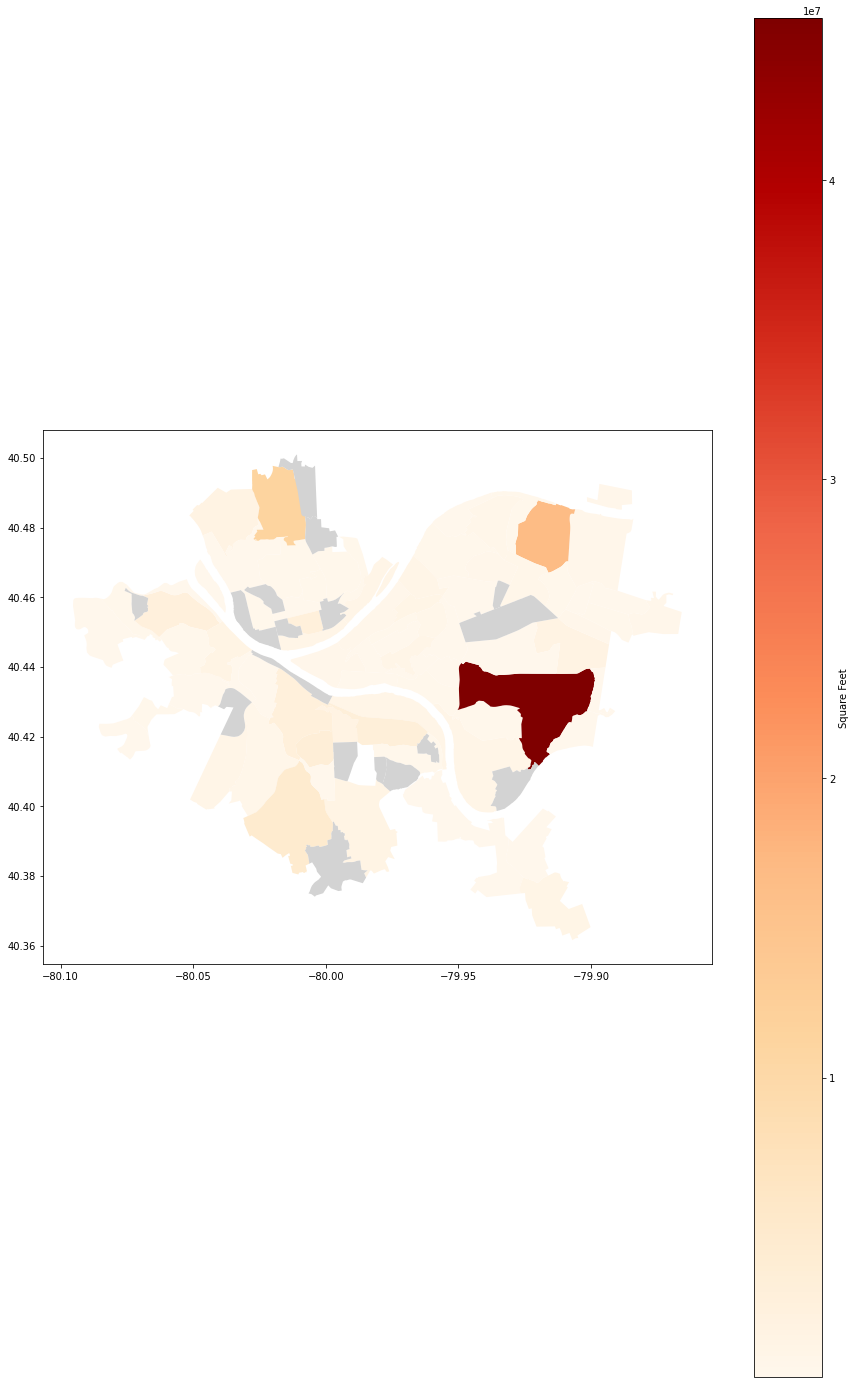

In [155]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
area_map = neighborhoods.merge(new_np, how='left', left_on= 'hood', right_on='Neighborhood')
area_map.plot(
    column='Square Footage',
    cmap='OrRd',
    legend=True,
    figsize=(15,25),
    legend_kwds={'label': "Square Feet"},
    missing_kwds={"color": "lightgrey"}
    )

Finally, I make a heat map based on the square footage of parks in different neighborhoods, as we can see, Squirrel Hill South has the most attractive color on the map. It's because both Schenley Park and Frick Park are in Squirrel Hill South.

# Conclusion

Although we know what our best neighborhood is because it is the same for all of us, we still wanted to normalize the data so see which neighborhoods were the best on average.

In the code below, we grab the maximums of each of our data. (Not sure why the corresponding values are incorrect.)

In [157]:
rob_med = df.max()
print(rob_med)
lin_med = new_rate.max()
print(lin_med)
zhi_med = new_np.max()
print(zhi_med)

Neighborhood    West End
Court Score           84
dtype: object
Neighborhood    Windgap
Rating         23.50000
dtype: object
Neighborhood            Windgap
Square Footage   45427494.89809
dtype: object


Next, we set each median to 100 and also apply that operation to every other value in each dataset.

In [158]:
curr1 = 0
curr2 = 0
curr3 = 0
df2 = df
new_rate2 = new_rate
new_np2 = new_np
for row, index in df2.iterrows():
    df2.iat[curr1, 1] = df2.iat[curr1, 1] * 11.9047619
    curr1 = curr1 + 1
print(df2)
for row, index in new_rate2.iterrows():
    new_rate2.iat[curr2, 1] = new_rate2.iat[curr2, 1] * 42.5531915
    curr2 = curr2 + 1
print(new_rate2)
for row, index in new_np2.iterrows():
    new_np2.iat[curr3, 1] = new_np2.iat[curr3, 1] / 45427.49489809
    curr3 = curr3 + 1
print(new_np2)

           Neighborhood  Court Score
0      Allegheny Center    345.23810
1             Beechview    345.23810
2     Bedford Dwellings    119.04762
3     South Side Slopes    309.52381
4      South Side Flats    226.19048
..                  ...          ...
58          Polish Hill     35.71429
59  Squirrel Hill North     35.71429
60   Point Breeze North     35.71429
61       Swisshelm Park     71.42857
62          Perry North     71.42857

[63 rows x 2 columns]
           Neighborhood     Rating
2   Squirrel Hill South 1000.00000
18         East Liberty  723.40426
0             Beechview  634.04255
14    South Side Slopes  438.29787
10             Sheraden  417.02128
..                  ...        ...
49  Lower Lawrenceville   59.57447
27      Central Oakland   55.31915
29               Esplen   55.31915
39       Strip District   17.02128
35         West Oakland   17.02128

[68 rows x 2 columns]
           Neighborhood  Square Footage
26  Squirrel Hill South      1000.00000
49        

Then, we created a dictionary and summed the values in each dataframe similarly to how Robby did it.

In [159]:
norm_data = {}
curr = 0
for row in new_np2.iterrows():
    try:
        norm_data[new_np2.iat[curr, 0]] = norm_data[new_np2.iat[curr, 0]] + new_np2.iat[curr, 1]
    except:
        norm_data[new_np2.iat[curr, 0]] = new_np2.iat[curr, 1]
    curr = curr + 1
curr = 0
for row in df2.iterrows():
    try:
        norm_data[df2.iat[curr, 0]] = norm_data[df2.iat[curr, 0]] + df2.iat[curr, 1]
    except:
        norm_data[df2.iat[curr, 0]] = df2.iat[curr, 1]
    curr = curr + 1
curr = 0
for row in new_rate2.iterrows():
    try:
        norm_data[new_rate2.iat[curr, 0]] = norm_data[new_rate2.iat[curr, 0]] + new_rate2.iat[curr, 1]
    except:
        norm_data[new_rate2.iat[curr, 0]] = new_rate2.iat[curr, 1]
    curr = curr + 1
norm_data

{'Squirrel Hill South': 2999.999999850021,
 'Highland Park': 1400.7061790350485,
 'Perry North': 516.6782411214591,
 'Brookline': 704.0518818511168,
 'Beltzhoover': 816.9265778016577,
 'South Side Slopes': 816.1384907013564,
 'Allegheny Center': 823.5429013448598,
 'Mount Washington': 588.7750878355967,
 'Sheraden': 735.1454978379209,
 'Brighton Heights': 367.3190738351249,
 'Point Breeze': 103.43744462630347,
 'Allentown': 210.23883377664276,
 'Carrick': 389.83229721815684,
 'Elliott': 600.2927502387597,
 'Lincoln Place': 493.73026140130463,
 'Polish Hill': 176.5000359335741,
 'Banksville': 328.0975793064066,
 'South Side Flats': 413.9585557308593,
 'Lower Lawrenceville': 315.14788835243064,
 'Hazelwood': 897.7966479624324,
 'North Shore': 16.63518326248831,
 'Troy Hill': 528.6038620064353,
 'Terrace Village': 426.2001186383052,
 'Beechview': 994.0249288563757,
 'Stanton Heights': 178.7222791992827,
 'East Liberty': 1020.9422348392509,
 'Upper Hill': 224.52130346418917,
 'Point Breeze

Next, we need to visualize the dictionary. We will do this by creating a bar chart based on our new normalized data.

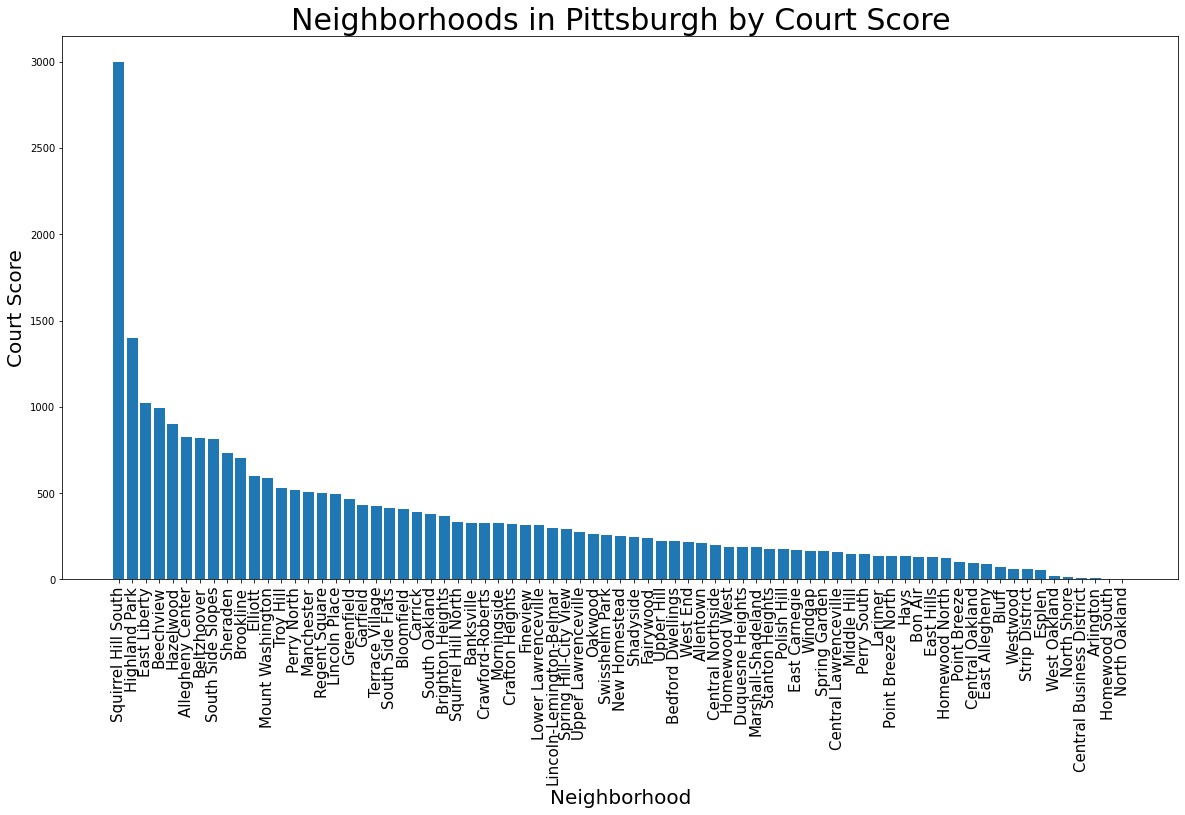

In [160]:
norm_df = pd.DataFrame(list(norm_data.items()), columns = ['Neighborhood', 'Normalized Score'])
plt.figure(figsize = (20,10))
plt.bar('Neighborhood', 'Normalized Score', data=norm_df.sort_values(by='Normalized Score', ascending=False))
plt.xlabel("Neighborhood", fontsize='20')
plt.ylabel("Court Score", fontsize='20')
plt.title("Neighborhoods in Pittsburgh by Court Score", fontsize='30')
plt.xticks(rotation = 90, fontsize='15')
plt.show()

We will show the top five values as these are the best neighborhoods according to our data.

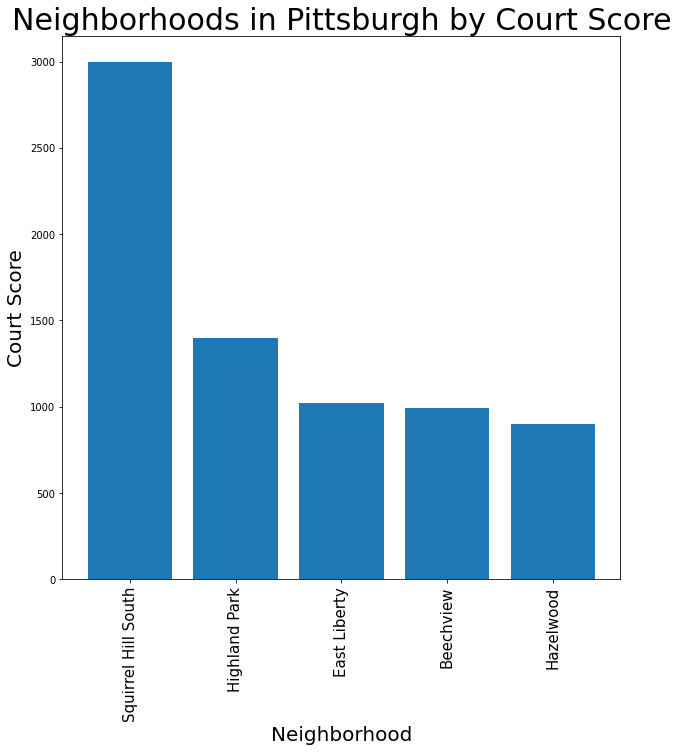

In [161]:
plt.figure(figsize = (10,10))
plt.bar('Neighborhood', 'Normalized Score', data=norm_df.sort_values(by='Normalized Score', ascending=False).head(5))
plt.xlabel("Neighborhood", fontsize='20')
plt.ylabel("Court Score", fontsize='20')
plt.title("Neighborhoods in Pittsburgh by Court Score", fontsize='30')
plt.xticks(rotation = 90, fontsize='15')
plt.show()

# Conclusion

Our data shows us clearly that Squirrel Hill South is the best neighborhood to live in as a child. Though not a close second, Highland Park is there, followed by Perry North, Brookline, and Beltzhoover in that order. Squirrel Hill South contains both Frick and Schenley park, so it being the best by far 